# Intelligent Systems
# Exercise 04 / Representation
### Working Group: Intelligent Systems
### Lecture: Prof. Dr.-Ing. habil.  Sven Tomforde
### Exercise: Ma. Sc. Simon Reichhuber (mail to: [Simon.Reichhuber@informatik.uni-kiel.de](mailto:Simon.Reichhuber@informatik.uni-kiel.de))

# Exercise 04 - Task 3

Implement the PCA procedure with the help of numpy. Compare your results with the results of sklearn's PCA.

In [1]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig

import pandas as pd
from pandas.plotting import parallel_coordinates
import numpy as np
from sklearn import preprocessing
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

---

In [2]:
def make_3D_plot(dataFrame, x_label="sepal_len", y_label="sepal_wid", z_label="petal_len"): 
        
    colors = {"Iris-setosa":'blue', "Iris-versicolor":"red", "Iris-virginica":'yellow'}
    
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')
    plt.rcParams['legend.fontsize'] = 10  
    
    grouped = dataFrame.groupby('class')
    for key, group in grouped:
        ax.plot(group[x_label],group[y_label], group[z_label], 'o', markersize=8, color=colors[key], alpha=0.5, label=key)

    plt.title('Iris Dataset')
    ax.legend(loc='upper right')
    
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_zlabel(z_label)

    plt.show()

In [3]:
def make_2D_plot(dataFrame):    
    
    colors = {"Iris-setosa":'blue', "Iris-versicolor":"red", "Iris-virginica":'yellow'}
    fig, ax = plt.subplots()
    grouped = dataFrame.groupby('class')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x=dataFrame.columns[0], y=dataFrame.columns[1], label=key, color=colors[key])
    plt.show()

## Import Iris Dataset 

You can use the following link to download the data: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

In [4]:
irisData = pd.read_csv(filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None, sep=',')
irisData.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']

In [5]:
irisData

sepal_len  sepal_wid  petal_len  petal_wid           class
0          5.1        3.5        1.4        0.2     Iris-setosa
1          4.9        3.0        1.4        0.2     Iris-setosa
2          4.7        3.2        1.3        0.2     Iris-setosa
3          4.6        3.1        1.5        0.2     Iris-setosa
4          5.0        3.6        1.4        0.2     Iris-setosa
..         ...        ...        ...        ...             ...
145        6.7        3.0        5.2        2.3  Iris-virginica
146        6.3        2.5        5.0        1.9  Iris-virginica
147        6.5        3.0        5.2        2.0  Iris-virginica
148        6.2        3.4        5.4        2.3  Iris-virginica
149        5.9        3.0        5.1        1.8  Iris-virginica

[150 rows x 5 columns]

## Plot Data to get an overview

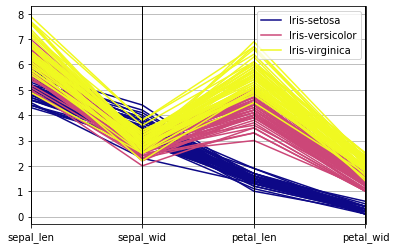

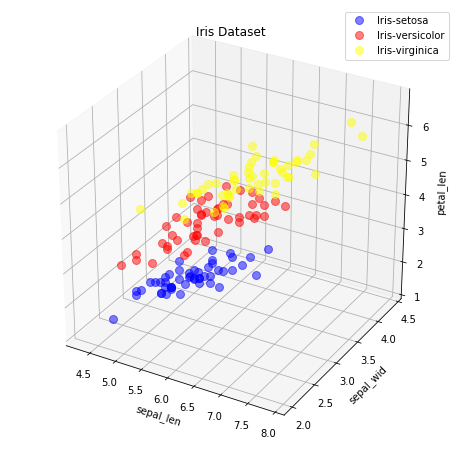

In [6]:
plt.figure()
parallel_coordinates(irisData, 'class', colormap="plasma")
make_3D_plot(irisData)
plt.show()

---

## Step 1: Standardize Data 

In [7]:
standardScaler = preprocessing.StandardScaler()
standardizedData = standardScaler.fit_transform(irisData.iloc[:,:4])

irisStandardizedData = pd.DataFrame(standardizedData, columns=irisData.columns[:4])
irisStandardizedData["class"] = irisData["class"]

In [8]:
irisStandardizedData

sepal_len  sepal_wid  petal_len  petal_wid           class
0    -0.900681   1.032057  -1.341272  -1.312977     Iris-setosa
1    -1.143017  -0.124958  -1.341272  -1.312977     Iris-setosa
2    -1.385353   0.337848  -1.398138  -1.312977     Iris-setosa
3    -1.506521   0.106445  -1.284407  -1.312977     Iris-setosa
4    -1.021849   1.263460  -1.341272  -1.312977     Iris-setosa
..         ...        ...        ...        ...             ...
145   1.038005  -0.124958   0.819624   1.447956  Iris-virginica
146   0.553333  -1.281972   0.705893   0.922064  Iris-virginica
147   0.795669  -0.124958   0.819624   1.053537  Iris-virginica
148   0.432165   0.800654   0.933356   1.447956  Iris-virginica
149   0.068662  -0.124958   0.762759   0.790591  Iris-virginica

[150 rows x 5 columns]

In [9]:
irisValues = irisStandardizedData.iloc[:,:4].values

## Step 2: Create Covariance Matrix

In [10]:
# calculate covariance matrix of centered matrix (use T)
covarianceMatrix = cov(irisValues.T)
covarianceMatrix

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

## Step 3: Find Eigenvecotrs and Eigenvalues to the Matrix

In [11]:
# eigendecomposition of covariance matrix
eigenValues, eigenVectors = eig(covarianceMatrix)
print(eigenValues)
print(eigenVectors)

[2.93035378 0.92740362 0.14834223 0.02074601]
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


### Plot Eigenvalue Distribution to find vectors with the highest variance

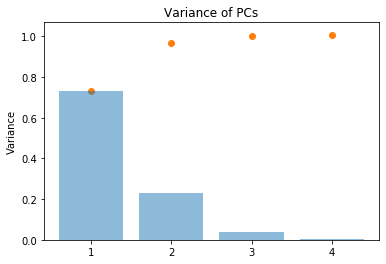

In [12]:
objects = list(range(1,len(eigenValues)+1))
y_pos = list(range(1,len(eigenValues)+1))
performance = eigenValues/len(eigenValues)
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.scatter(x=[1,2,3,4], y=np.cumsum(eigenValues/4))
plt.ylabel('Variance')
plt.title('Variance of PCs')
 
plt.show()

## Step 4: Project Original Data onto new PC coordinates (new feature space)

In [13]:
pc_Matrix = eigenVectors[:,:2]
print(eigenVectors)
print("----------")
print(pc_Matrix)

[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]
----------
[[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [14]:
transformedData = irisValues.dot(pc_Matrix)
# equivalent to transformedData = pc_Matrix.dot(irisValues.T).T

### Plot new data and feature space

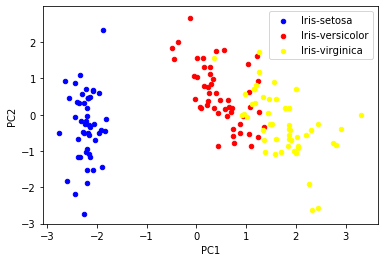

In [15]:
transformedFrame = pd.DataFrame(transformedData, columns=["PC1", "PC2"])
transformedFrame["class"] = irisData["class"]

make_2D_plot(transformedFrame)

---

## Step 0: Do it with sklearn :)

In [ ]:
from sklearn.decomposition import PCA as sklearnPCA
pca = sklearnPCA(n_components=2)
pcaTransformedData = pca.fit_transform(irisValues)

In [ ]:
pcaTransformedFrame = pd.DataFrame(pcaTransformedData, columns=["PC1", "PC2"])
pcaTransformedFrame["class"] = irisData["class"]

make_2D_plot(pcaTransformedFrame)

In [ ]:
print(pca)